# PACKAGES AND LIBRARIES

#### GENERAL

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### PATH

In [4]:
import os
import os.path
from pathlib import Path
import glob

#### IMAGE PROCESS

In [5]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### SCALER & TRANSFORMATION

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

#### ACCURACY CONTROL

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

#### OPTIMIZER

In [8]:
from keras.optimizers import RMSprop,Adam,Optimizer

#### MODEL LAYERS

In [9]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19

#### IGNORING WARNINGS

In [10]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# PATH

In [11]:
Brain_CT_Path = Path("./DLprojectData")

* file path is determined

In [12]:
JPG_Path = list(Brain_CT_Path.glob(r"**/*.jpg"))

* all images in the file path are assigned to a list

# LABEL

In [13]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))

* the categories of the images are separated

# TRANSFORMATION TO SERIES

In [14]:
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)

In [15]:
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")

* it is converted to Series structure before it is converted to DataFrame

# TRANSFORMATION TO DATAFRAME

In [16]:
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

* it is converted to DataFrame

In [17]:
print(Main_Data.head(-1))

                                                    JPG CATEGORY
0     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_0...   11[11]
1     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...   11[11]
2     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...   11[11]
3     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...   11[11]
4     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...   11[11]
...                                                 ...      ...
6789            DLprojectData\NORMAL\N9[N9]\N9_0_94.jpg   N9[N9]
6790            DLprojectData\NORMAL\N9[N9]\N9_0_95.jpg   N9[N9]
6791            DLprojectData\NORMAL\N9[N9]\N9_0_96.jpg   N9[N9]
6792            DLprojectData\NORMAL\N9[N9]\N9_0_97.jpg   N9[N9]
6793            DLprojectData\NORMAL\N9[N9]\N9_0_98.jpg   N9[N9]

[6794 rows x 2 columns]


#### REPLACING

In [18]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [19]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

* we have to change the names because the categories in the data are complex

In [20]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_0...  Hemorrhage
1     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...  Hemorrhage
2     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...  Hemorrhage
3     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...  Hemorrhage
4     DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_1...  Hemorrhage
...                                                 ...         ...
6789            DLprojectData\NORMAL\N9[N9]\N9_0_94.jpg      Normal
6790            DLprojectData\NORMAL\N9[N9]\N9_0_95.jpg      Normal
6791            DLprojectData\NORMAL\N9[N9]\N9_0_96.jpg      Normal
6792            DLprojectData\NORMAL\N9[N9]\N9_0_97.jpg      Normal
6793            DLprojectData\NORMAL\N9[N9]\N9_0_98.jpg      Normal

[6794 rows x 2 columns]


In [21]:
print(Main_Data["CATEGORY"].value_counts())

CATEGORY
Normal        4105
Hemorrhage    2690
Name: count, dtype: int64


# SHUFFLING

In [22]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

* we have to mix the data to increase the success of the model and maintain its objectivity.

In [23]:
print(Main_Data.head(-1))

                                                    JPG    CATEGORY
0               DLprojectData\NORMAL\N4[N4]\N4_0_17.jpg      Normal
1            DLprojectData\NORMAL\N10[N10]\N10_0_26.jpg      Normal
2     DLprojectData\Hemorrhagic\KANAMA\5[5]\5_0_132.jpg  Hemorrhage
3     DLprojectData\Hemorrhagic\KANAMA\14[14]\14_0_1...  Hemorrhage
4            DLprojectData\NORMAL\N10[N10]\N10_0_21.jpg      Normal
...                                                 ...         ...
6789         DLprojectData\NORMAL\N13[N13]\N13_0_37.jpg      Normal
6790        DLprojectData\NORMAL\N15[N15]\N15_0_107.jpg      Normal
6791         DLprojectData\NORMAL\N24[N24]\N24_0_36.jpg      Normal
6792         DLprojectData\NORMAL\N17[N17]\N17_0_81.jpg      Normal
6793   DLprojectData\Hemorrhagic\KANAMA\2[2]\2_0_85.jpg  Hemorrhage

[6794 rows x 2 columns]


# VISUALIZATION

In [24]:
plt.style.use('dark_background')

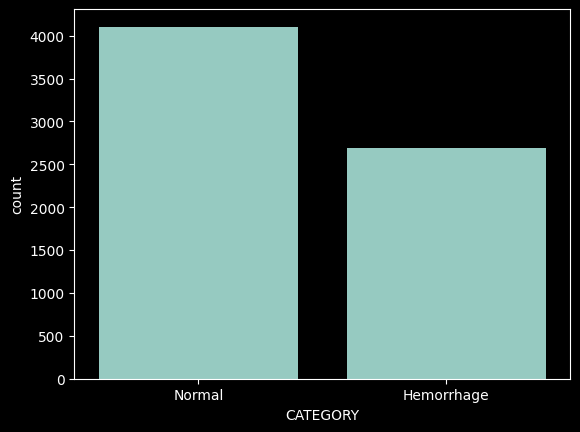

In [25]:
sns.countplot(x="CATEGORY", data=Main_Data)
plt.show()

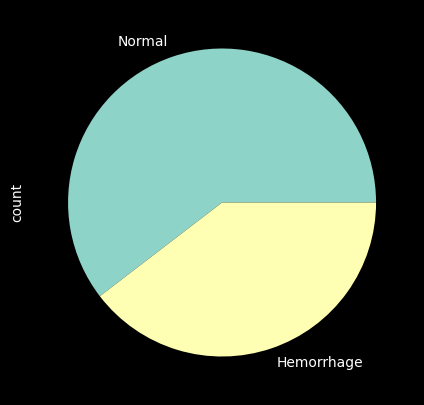

In [26]:
Main_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

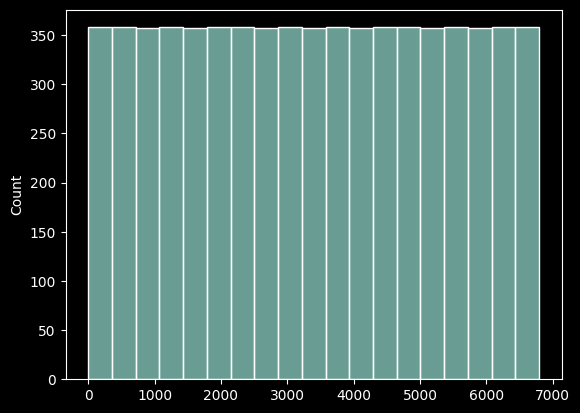

In [27]:
sns.histplot(Main_Data['CATEGORY'].index)
plt.show()

Text(0.5, 1.0, 'Normal')

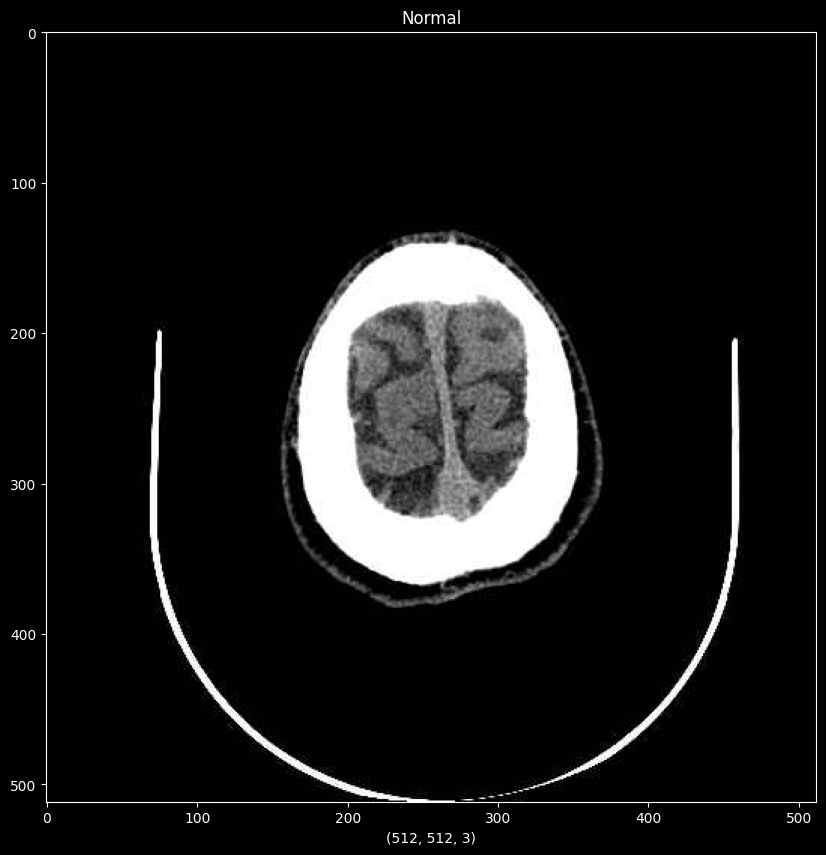

In [28]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][0])

Text(0.5, 1.0, 'Normal')

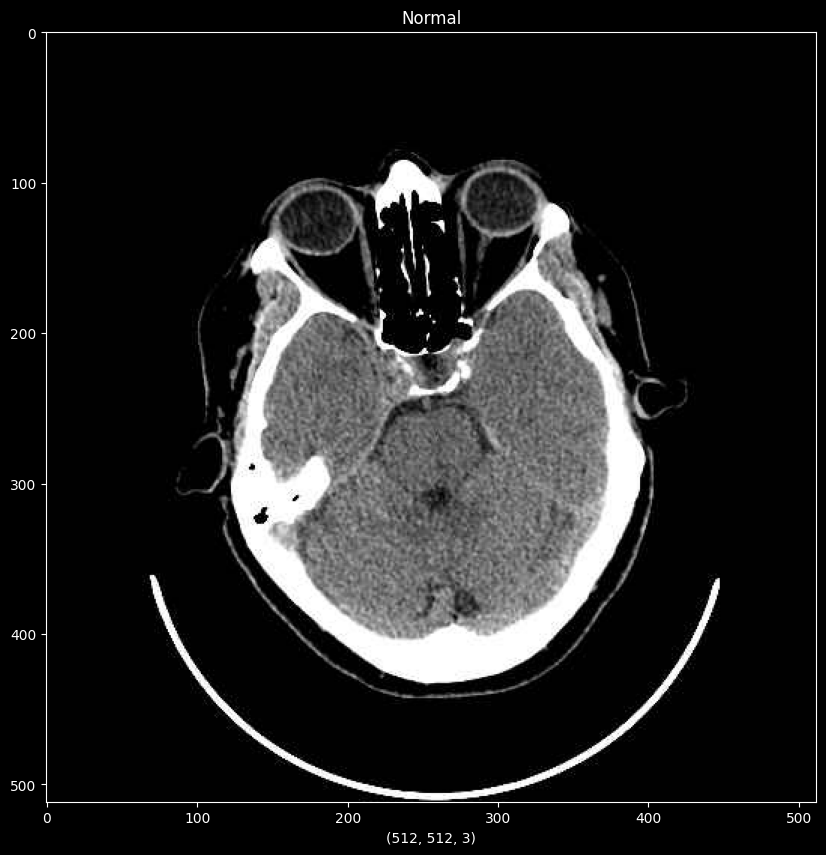

In [29]:
figure = plt.figure(figsize=(10,10))
x = plt.imread(Main_Data["JPG"][25])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Data["CATEGORY"][6769])

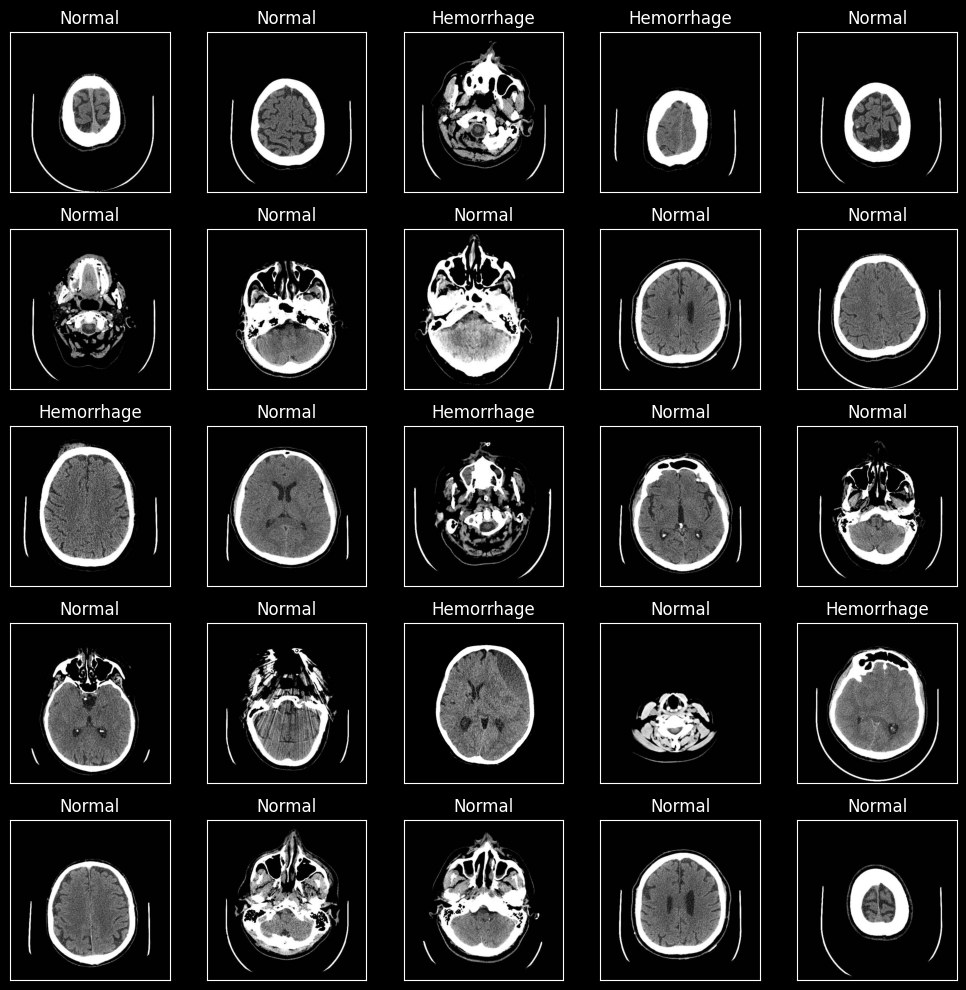

In [30]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

In [31]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

* we divided it into test and training set
* we set the shuffle parameter to True for training quality
* we told it to use the same data as random state

In [32]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (6115, 2)
TEST SHAPE:  (680, 2)


In [33]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                                    JPG    CATEGORY
4848  DLprojectData\Hemorrhagic\KANAMA\17[17]__\IMG-...  Hemorrhage
1858        DLprojectData\NORMAL\N18[N18]\N18_0_208.jpg      Normal
1839  DLprojectData\Hemorrhagic\KANAMA\11[11]\11_0_5...  Hemorrhage
5572        DLprojectData\NORMAL\N20[N20]\N20_0_199.jpg      Normal
1662        DLprojectData\NORMAL\N16[N16]\N16_0_127.jpg      Normal
...                                                 ...         ...
3092   DLprojectData\Hemorrhagic\KANAMA\5[5]\5_0_62.jpg  Hemorrhage
3772  DLprojectData\Hemorrhagic\KANAMA\4[4]\4_0_156.jpg  Hemorrhage
5191         DLprojectData\NORMAL\N20[N20]\N20_0_11.jpg      Normal
5226  DLprojectData\Hemorrhagic\KANAMA\7[7]\7_0_125.jpg  Hemorrhage
5390            DLprojectData\NORMAL\N2[N2]\N2_0_23.jpg      Normal

[6114 rows x 2 columns]
--------------------------------------------------------------------------------
                                                    JPG    CATEGORY
2164  DLpr

# IMAGE GENERATOR

In [34]:
Generator = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                              validation_split=0.1)

* we used diversification so that the model does not shift to the overfitting orientation

In [35]:
Test_Generator = ImageDataGenerator(rescale=1./255)

* we don't need diversification for test data, we will use it as it is

#### How Generator Applied Image Look Like

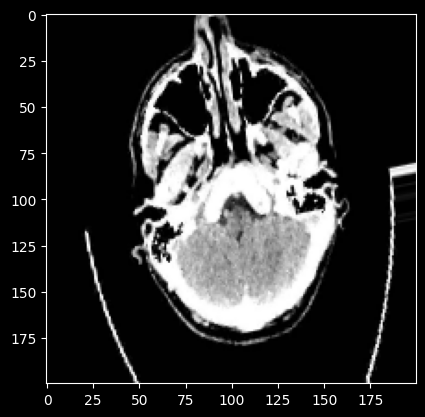

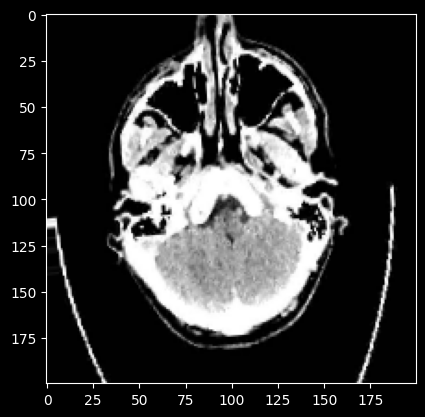

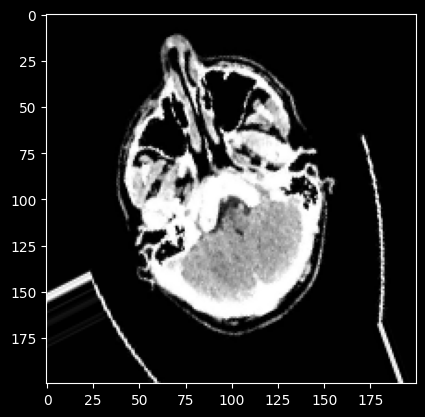

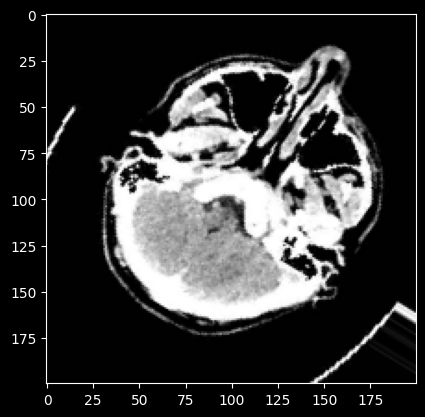

In [37]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

example_Image = Train_Data["JPG"][99]
Load_Image = image.load_img(example_Image, target_size=(200, 200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Generator.flow(Array_Image, batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [38]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                             color_mode="grayscale",
                                             class_mode="categorical",
                                             subset="training")

Found 5504 validated image filenames belonging to 2 classes.


In [39]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                                  x_col="JPG",
                                                  y_col="CATEGORY",
                                                  color_mode="grayscale",
                                                  class_mode="categorical",
                                                  subset="validation")

Found 611 validated image filenames belonging to 2 classes.


In [40]:
Test_IMG_Set = Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                 color_mode="grayscale",
                                                 class_mode="categorical")

Found 680 validated image filenames belonging to 2 classes.


#### CHECKING

In [41]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [42]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 1)
LABEL SHAPE:  (32, 2)


In [43]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 1, 1, 1, 1]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[0, 1, 0, 1, 1]
(256, 256, 1)
------------------------------------------------------------
TEST: 


In [44]:
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

32
(256, 256, 1)


# CNN STRUCTURE WITH LSTM / RCNN

In [45]:
Model = Sequential()

Model.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,1)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(24,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(TimeDistributed(Flatten()))
Model.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(2,activation="softmax"))

* LSTM and GRU are iterative layers

* LSTM and GRU serve to inject past information into the future, thereby reducing the gradient destruction problem

* we used LSTM and GRU layers both with fully-connetted layers and Conv2D
* RCNN structure is created in this way
* we determined the LSTM and GRU layers as bidirectional

* less problem of gradient disappearance in LSTM and GRU

* we used it with Dropout so that the model does not shift to overfitting orientation
* we made return_success True because we wanted each process to generate output separately

* we also used dropout within the GRU and LSTM layers to prevent the model from shifting to the overfitting orientation
* recurrent_dropout means transmission damping ratio of iterative layers

Loss Function We Used:


![](https://gombru.github.io/assets/cross_entropy_loss/intro.png)

* Activation Function:

![](http://rasbt.github.io/mlxtend/user_guide/general_concepts/activation-functions_files/activation-functions.png)

In [46]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

* we wanted the training of the model to stop where the loss value is minimal

In [47]:
Model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [50]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print("Available devices:", get_available_devices())

Available devices: ['/device:CPU:0', '/device:GPU:0']


In [53]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                        epochs=8++++++0,
                        verbose=1)

Epoch 1/80
172/172 [==============================] - 834s 5s/step - loss: 0.6597 - accuracy: 0.6201 - val_loss: 0.6268 - val_accuracy: 0.6432
Epoch 2/80
172/172 [==============================] - 838s 5s/step - loss: 0.6555 - accuracy: 0.6232 - val_loss: 0.6018 - val_accuracy: 0.6989
Epoch 3/80
172/172 [==============================] - 916s 5s/step - loss: 0.6452 - accuracy: 0.6324 - val_loss: 0.6212 - val_accuracy: 0.6448
Epoch 4/80
172/172 [==============================] - 1028s 6s/step - loss: 0.6356 - accuracy: 0.6394 - val_loss: 0.6000 - val_accuracy: 0.6694
Epoch 5/80
172/172 [==============================] - 984s 6s/step - loss: 0.6344 - accuracy: 0.6488 - val_loss: 0.5817 - val_accuracy: 0.6841
Epoch 6/80
172/172 [==============================] - 980s 6s/step - loss: 0.6184 - accuracy: 0.6657 - val_loss: 0.5690 - val_accuracy: 0.6939
Epoch 7/80
172/172 [==============================] - 968s 6s/step - loss: 0.6060 - accuracy: 0.6822 - val_loss: 0.5765 - val_accuracy: 0.702

#### CHECKING

In [54]:
Model_Results = Model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.3231
ACCURACY:  0.86


In [55]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 12)      120       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 12)     48        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 12)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 24)      2616      
                                                                 
 dropout (Dropout)           (None, 127, 127, 24)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 24)       0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


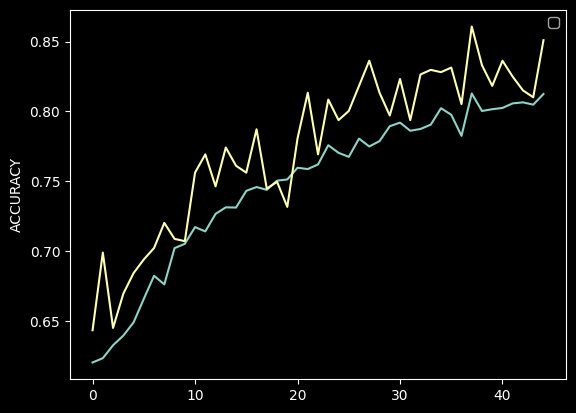

In [63]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


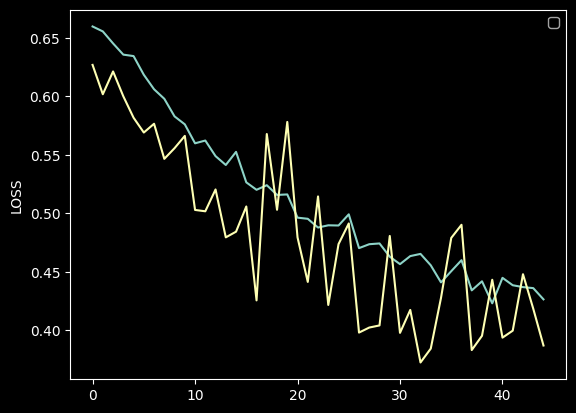

In [64]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


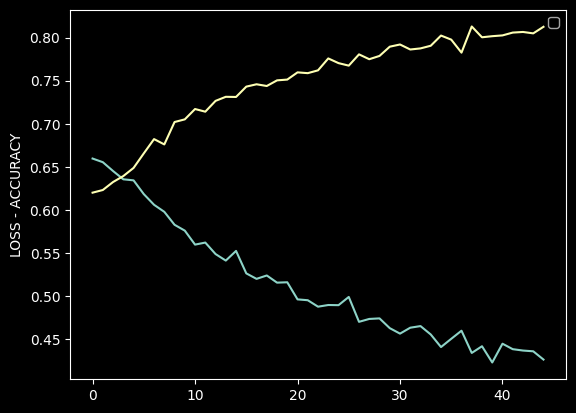

In [65]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["accuracy"])
plt.ylabel("LOSS - ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


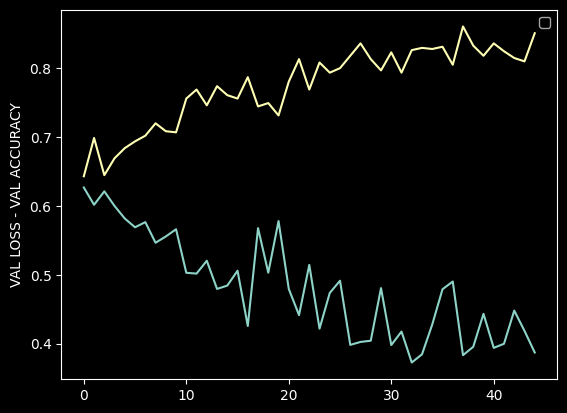

In [66]:
plt.plot(CNN_Model.history["val_loss"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("VAL LOSS - VAL ACCURACY")
plt.legend()
plt.show()

<Axes: >

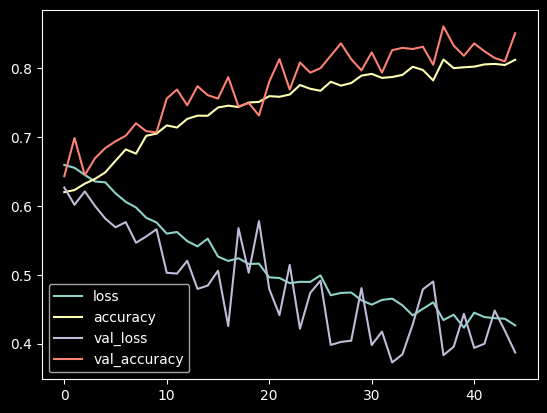

In [67]:
Dict_Summary = pd.DataFrame(CNN_Model.history)
Dict_Summary.plot()


#### PREDICTION

In [61]:
Prediction = Model.predict(Test_IMG_Set)
Prediction = Prediction.argmax(axis=-1)

22/22 [==============================] - 23s 791ms/step


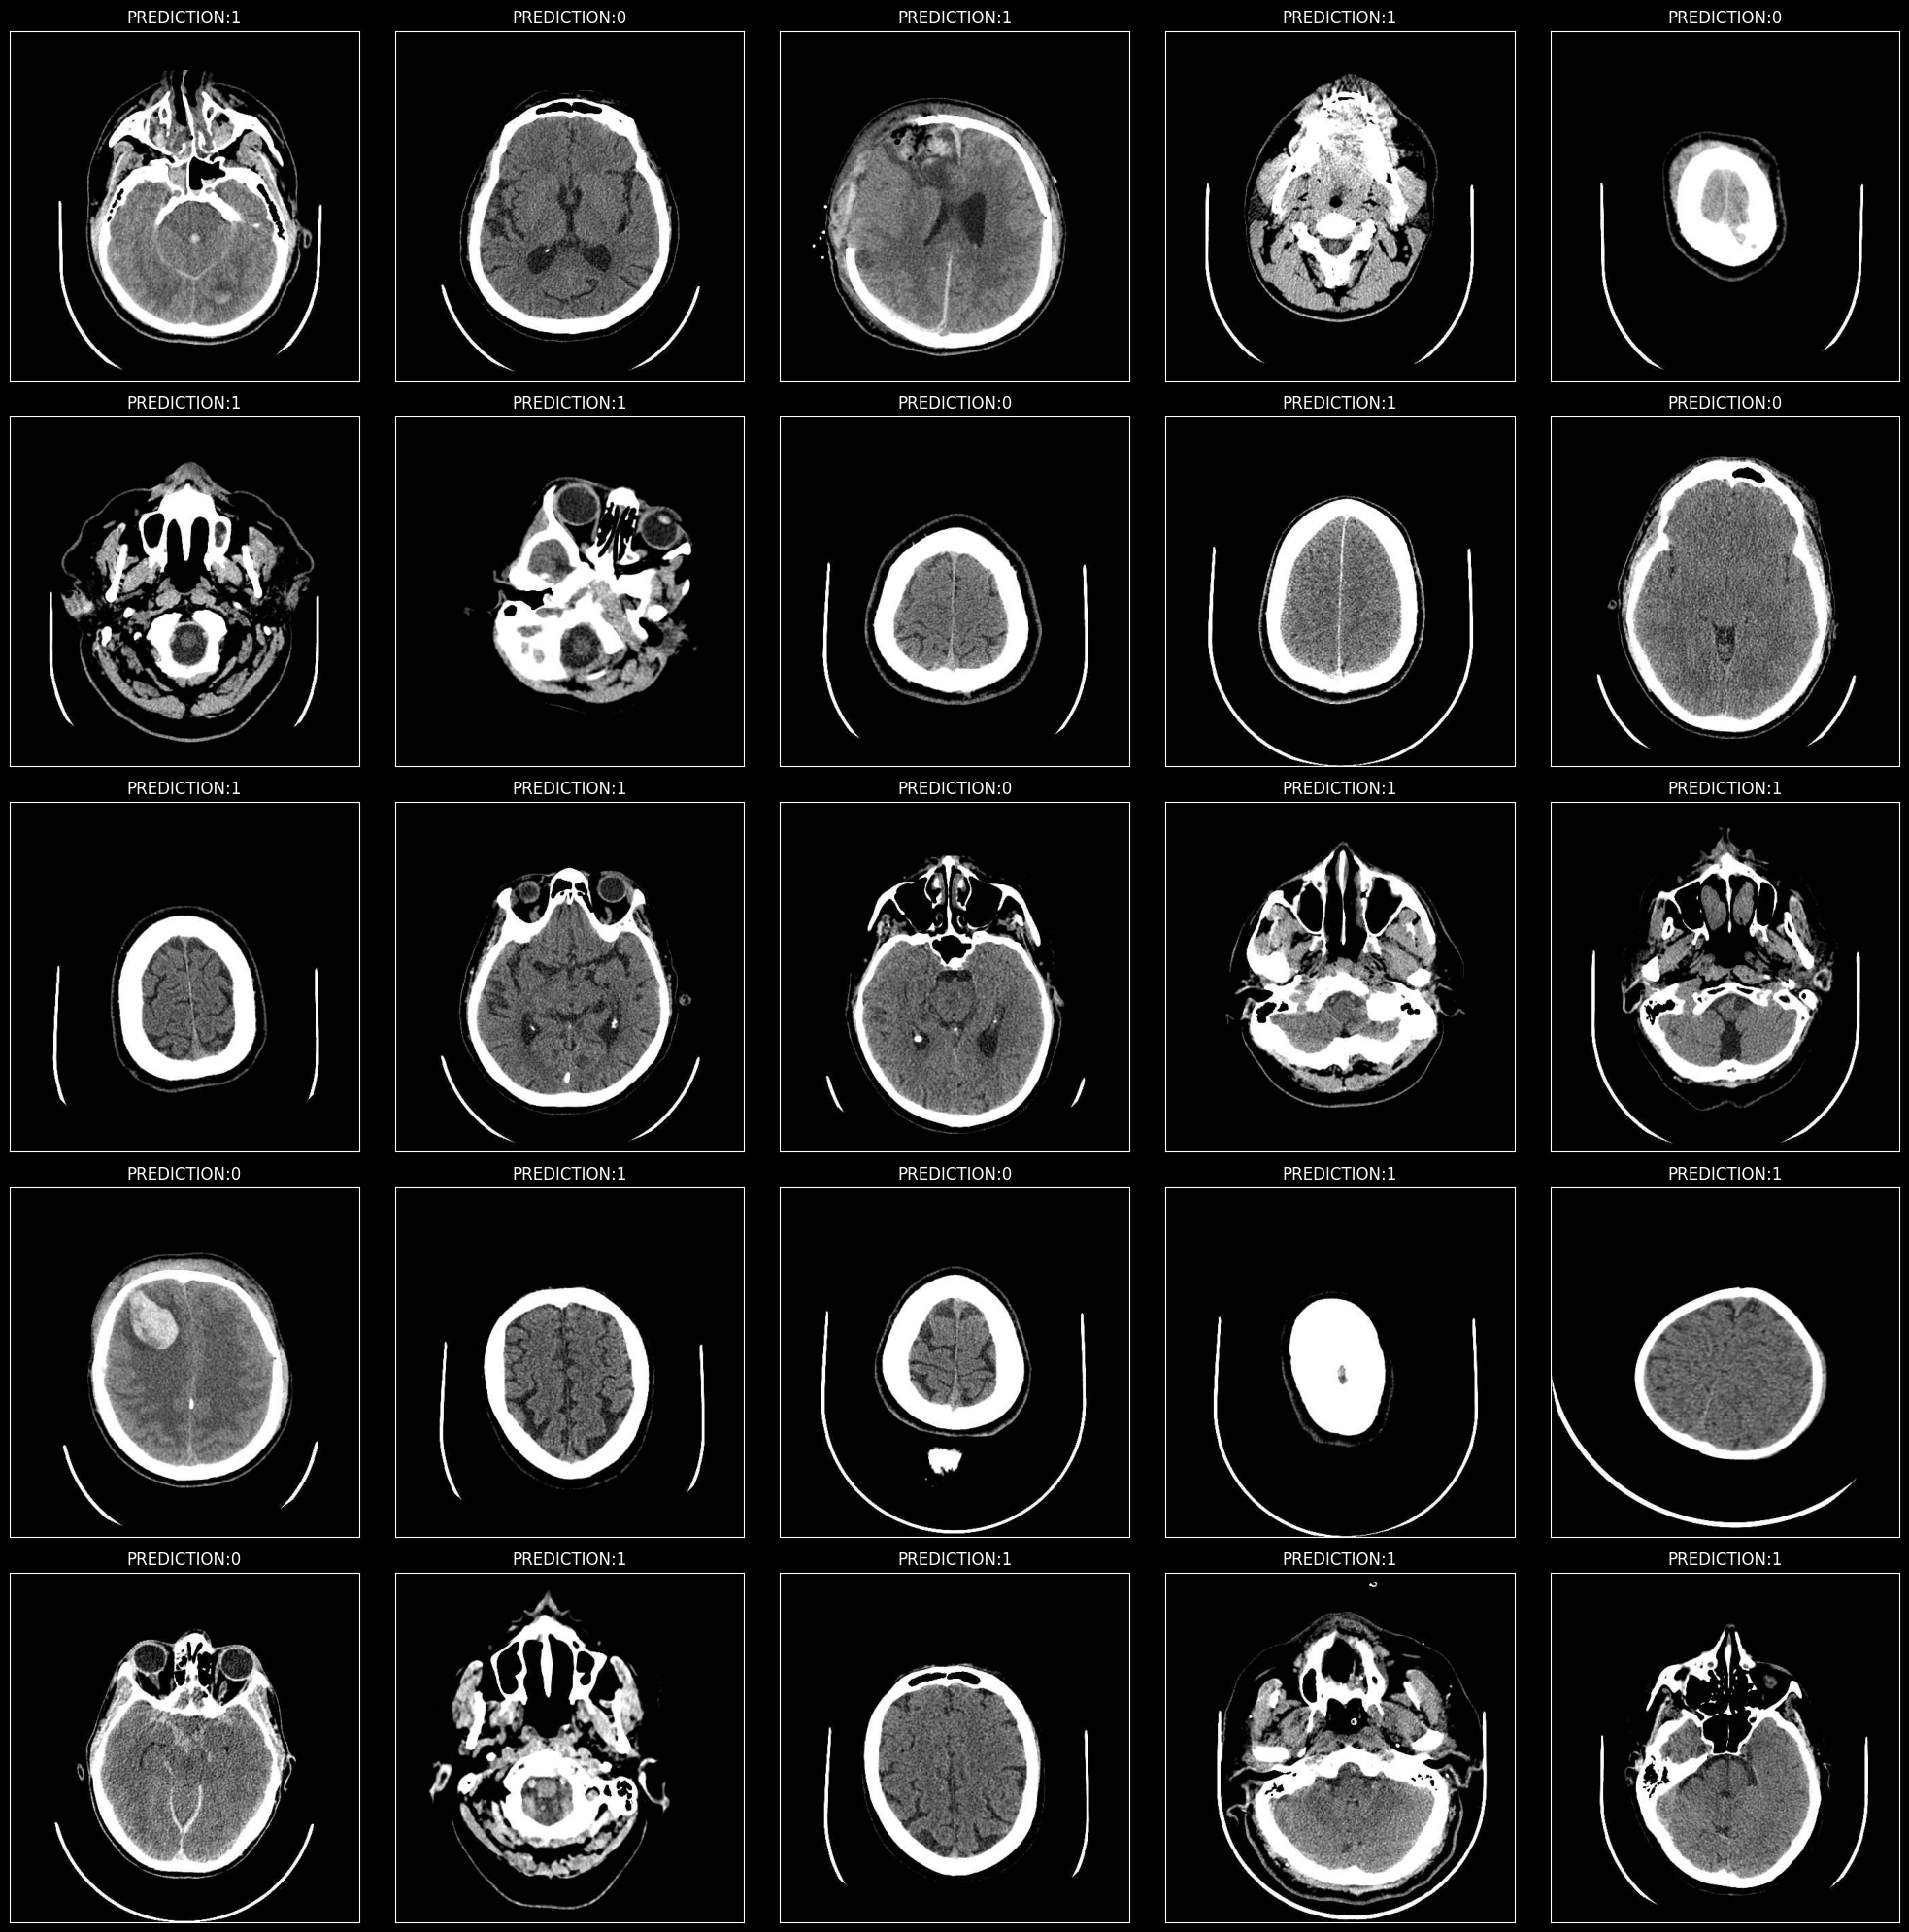

In [62]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Test_Data["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Prediction[i]}")
plt.tight_layout()
plt.show()